# Step A: Data Preprocessing

## import the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

## import the dataset

In [24]:
data = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                              validation_split = 0.2,
                               horizontal_flip = True)
training_set = data.flow_from_directory('TRAIN',
                                       target_size = (32, 32),
                                       color_mode="rgb",
                                       class_mode = 'categorical',
                                       batch_size = 32,
                                       shuffle = True,
                                       seed = 42,
                                       subset = 'training')
val_data = data.flow_from_directory(directory = 'TRAIN',
                                          target_size = (32, 32),
                                          color_mode = 'rgb',
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          seed = 42,
                                          subset = 'validation')


Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.


In [25]:
data2 = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
test_set = data2.flow_from_directory('TEST',
                                       target_size = (32, 32),
                                       color_mode="rgb",
                                       batch_size = 32,
                                       class_mode = 'categorical')

Found 2487 images belonging to 4 classes.


## Visualisation of some examples of different categories of blood cells

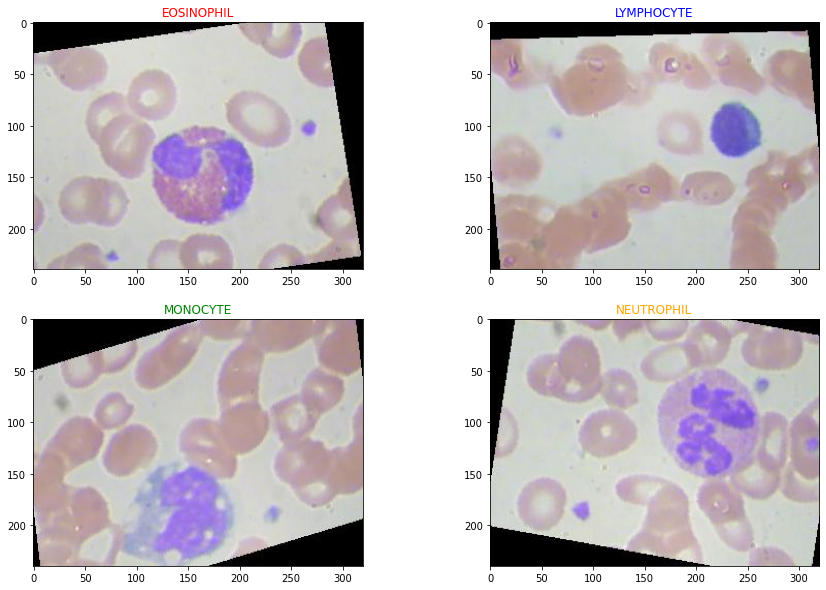

In [26]:
img1 = mpimg.imread('TEST\EOSINOPHIL\_0_967.jpeg')
img2 = mpimg.imread('TEST\LYMPHOCYTE\_0_1050.jpeg')
img4 = mpimg.imread('neutrophil.jpeg')
img3 = mpimg.imread('TEST\MONOCYTE\_0_531.jpeg')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.imshow(img1)
ax1.set_title("EOSINOPHIL",color='red')
ax2.imshow(img2)
ax2.set_title("LYMPHOCYTE",color='blue')
ax3.imshow(img3)
ax3.set_title("MONOCYTE",color='green')
ax4.imshow(img4)
ax4.set_title("NEUTROPHIL",color='orange')
plt.show()

# Step B: CNN Model

## Part 1: Building the CNN Model

### Initializing the CNN

In [27]:
cnn_model = tf.keras.models.Sequential()

### Convolution and Pooling

In [28]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = [32, 32, 3]))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2)) 

### Adding a second Convolution Layer

In [29]:
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2)) 

### Adding a third Convolution Layer

In [30]:
cnn_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

### Flattening

In [31]:
cnn_model.add(Flatten())

### Full Connection

In [32]:
cnn_model.add(Dense(128,activation='relu'))

### Output Layer

In [33]:
cnn_model.add(Dense(units=4,activation='softmax'))

### Compile the model

In [34]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Part 2: Train the Model

In [35]:
history = cnn_model.fit(training_set, validation_data = val_data, epochs = 80)

Epoch 1/80
249/249 [==============================] - 13s 52ms/step - loss: 1.3332 - accuracy: 0.3129 - val_loss: 1.1598 - val_accuracy: 0.3982
Epoch 2/80
249/249 [==============================] - 13s 51ms/step - loss: 1.1409 - accuracy: 0.4286 - val_loss: 1.1130 - val_accuracy: 0.4490
Epoch 3/80
249/249 [==============================] - 13s 52ms/step - loss: 1.0848 - accuracy: 0.4833 - val_loss: 1.0589 - val_accuracy: 0.5148
Epoch 4/80
249/249 [==============================] - 15s 59ms/step - loss: 0.9570 - accuracy: 0.5702 - val_loss: 0.8549 - val_accuracy: 0.6244
Epoch 5/80
249/249 [==============================] - 15s 59ms/step - loss: 0.7967 - accuracy: 0.6391 - val_loss: 0.8561 - val_accuracy: 0.6209
Epoch 6/80
249/249 [==============================] - 15s 61ms/step - loss: 0.7266 - accuracy: 0.6624 - val_loss: 0.6424 - val_accuracy: 0.7004
Epoch 7/80
249/249 [==============================] - 16s 64ms/step - loss: 0.6452 - accuracy: 0.7016 - val_loss: 0.6658 - val_accuracy:

249/249 [==============================] - 17s 67ms/step - loss: 0.1157 - accuracy: 0.9565 - val_loss: 0.2061 - val_accuracy: 0.9211
Epoch 58/80
249/249 [==============================] - 17s 68ms/step - loss: 0.0997 - accuracy: 0.9598 - val_loss: 0.1530 - val_accuracy: 0.9427
Epoch 59/80
249/249 [==============================] - 16s 66ms/step - loss: 0.0881 - accuracy: 0.9671 - val_loss: 0.1572 - val_accuracy: 0.9422
Epoch 60/80
249/249 [==============================] - 16s 66ms/step - loss: 0.0916 - accuracy: 0.9665 - val_loss: 0.2568 - val_accuracy: 0.9110
Epoch 61/80
249/249 [==============================] - 17s 69ms/step - loss: 0.1119 - accuracy: 0.9568 - val_loss: 0.2147 - val_accuracy: 0.9281
Epoch 62/80
249/249 [==============================] - 17s 68ms/step - loss: 0.1128 - accuracy: 0.9547 - val_loss: 0.1620 - val_accuracy: 0.9351
Epoch 63/80
249/249 [==============================] - 17s 68ms/step - loss: 0.0862 - accuracy: 0.9694 - val_loss: 0.2420 - val_accuracy: 0.91

### Plotting the Training Loss and Validation Loss

Text(0.5, 1.0, 'plot of loss function')

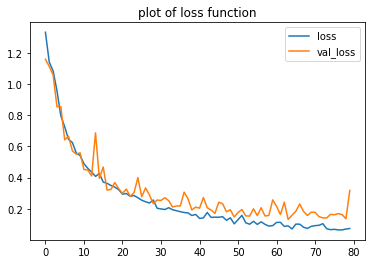

In [36]:
model_losses= pd.DataFrame(cnn_model.history.history)
model_losses['loss']
plt.plot(model_losses['loss'],label='loss')
plt.plot(model_losses['val_loss'],label='val_loss')
plt.legend()
plt.title('plot of loss function')

### Plotting the training accuracy and validation accuracy

Text(0.5, 1.0, 'plot of accuracy function')

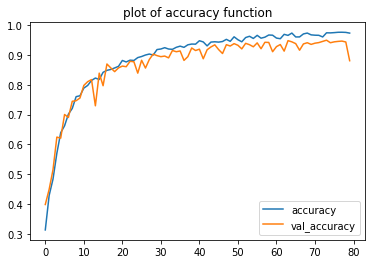

In [37]:
plt.plot(model_losses['accuracy'],label='accuracy')
plt.plot(model_losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('plot of accuracy function')

### Combined plot of Accuracy and Losses

<AxesSubplot:>

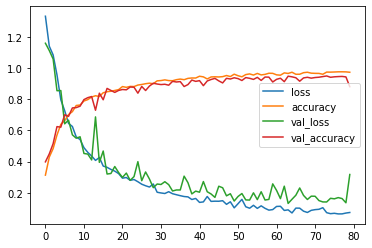

In [38]:
model_losses.plot()

## Part 3:Evaluate the model

In [39]:
score = cnn_model.evaluate(val_data,verbose=0)
score

[0.30715492367744446, 0.8908999562263489]

In [40]:
print('Test Loss: {:.2f}'.format(score[0]))
print('Test Accuracy: {:.2f}'.format(score[1]))

Test Loss: 0.31
Test Accuracy: 0.89


## Part 4: Prediction

In [41]:
from keras.preprocessing.image import image_utils
predict_image = image_utils.load_img('TEST\EOSINOPHIL\_0_196.jpeg',target_size = (32,32))
print(predict_image.mode)
print(predict_image.size)

RGB
(32, 32)


In [42]:
predict_image = image_utils.img_to_array(predict_image)
print(predict_image.dtype)
print(predict_image.shape)
predict_image = np.expand_dims(predict_image,axis = 0)
result = cnn_model.predict(predict_image)

float32
(32, 32, 3)
1/1 [==============================] - 0s 71ms/step


In [43]:
training_set.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [44]:
result

array([[0., 1., 0., 0.]], dtype=float32)